1. Import des bibliothèques de base

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Paramétrage pour une visualisation propre
sns.set(style="whitegrid")
%matplotlib inline

2. Chargement du dataset Meteo

In [2]:
df = pd.read_csv("//wsl.localhost/Ubuntu/home/tojo/airflow/data/star_schema/fact_weather.csv")

In [3]:
df.head()

,date_extraction,temperature,temp_min,temp_max,humidite,pression,vent_vitesse,vent_direction,precipitation,description,ville_id
0,2021-01-01,2.5,0.8,4.0,67.8,1028.9,15.5,42.1,15.33,"Rain, Partially cloudy",4
1,2021-01-02,5.8,2.5,10.8,74.0,1012.4,25.5,310.2,2.38,"Rain, Partially cloudy",4
2,2021-01-03,2.5,1.5,3.3,80.7,1017.0,24.1,40.2,5.07,"Snow, Rain, Partially cloudy",4
3,2021-01-04,3.6,1.9,6.1,76.6,1014.6,17.3,7.6,0.85,"Snow, Rain, Partially cloudy",4
4,2021-01-05,3.8,3.0,5.0,68.7,1013.1,15.2,3.7,0.00,Overcast,4


3. Aperçu général du dataset

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9130 entries, 0 to 9129
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date_extraction  9130 non-null   object 
 1   temperature      9130 non-null   float64
 2   temp_min         9130 non-null   float64
 3   temp_max         9130 non-null   float64
 4   humidite         9130 non-null   float64
 5   pression         9130 non-null   float64
 6   vent_vitesse     9130 non-null   float64
 7   vent_direction   9130 non-null   float64
 8   precipitation    9130 non-null   float64
 9   description      9130 non-null   object 
 10  ville_id         9130 non-null   int64  
dtypes: float64(8), int64(1), object(2)
memory usage: 784.7+ KB


In [17]:
df.describe()

,temperature,temp_min,temp_max,humidite,pression,vent_vitesse,vent_direction,precipitation,ville_id
count,9130.000000,9130.000000,9130.000000,9130.000000,9130.000000,9130.000000,9130.000000,9130.000000,9130.000000
mean,15.013369,11.544976,18.917364,69.696320,1015.986999,19.713897,187.936112,3.159861,3.000000
std,7.216244,7.058131,7.827524,14.251864,8.063289,7.678883,99.697007,9.454440,1.414291
min,-11.500000,-15.400000,-9.400000,19.100000,966.700000,1.200000,0.000000,0.000000,1.000000
25%,9.700000,6.400000,12.900000,60.600000,1011.400000,14.900000,106.450000,0.000000,2.000000
50%,15.200000,11.500000,19.400000,71.100000,1016.200000,18.800000,199.400000,0.020000,3.000000
75%,20.400000,16.700000,24.700000,80.500000,1020.900000,24.000000,266.775000,2.200000,4.000000
max,32.600000,29.800000,40.000000,99.900000,1046.200000,65.300000,360.000000,208.300000,5.000000


4. Vérification des types de colonnes et des valeurs uniques

In [4]:
df.dtypes

date_extraction     object
temperature        float64
temp_min           float64
temp_max           float64
humidite           float64
pression           float64
vent_vitesse       float64
vent_direction     float64
precipitation      float64
description         object
ville_id             int64
dtype: object

In [5]:
print("ID des villes :", df['ville_id'].unique())

ID des villes : [4 3 1 5 2]


In [6]:
print("Les differente condition meteorologique :", df['description'].unique())

Les differente condition meteorologique : ['Rain, Partially cloudy' 'Snow, Rain, Partially cloudy' 'Overcast'
 'Partially cloudy' 'Clear' 'Snow, Rain, Overcast'
 'Snow, Partially cloudy' 'Snow' 'Rain, Overcast' 'Rain'
 'Snow, Rain, Ice, Overcast' 'Snow, Rain, Ice, Partially cloudy'
 'Snow, Freezing Drizzle/Freezing Rain, Ice, Overcast' 'Snow, Rain'
 'overcast clouds' 'broken clouds' 'clear sky']


5. Détection de données manquantes et doublons

In [7]:
print("Valeurs manquantes par colonne :\n", df.isnull().sum())
print("Nombre de doublons :", df.duplicated().sum())

Valeurs manquantes par colonne :
 date_extraction    0
temperature        0
temp_min           0
temp_max           0
humidite           0
pression           0
vent_vitesse       0
vent_direction     0
precipitation      0
description        0
ville_id           0
dtype: int64
Nombre de doublons : 0


6. Visualisation de la temperature

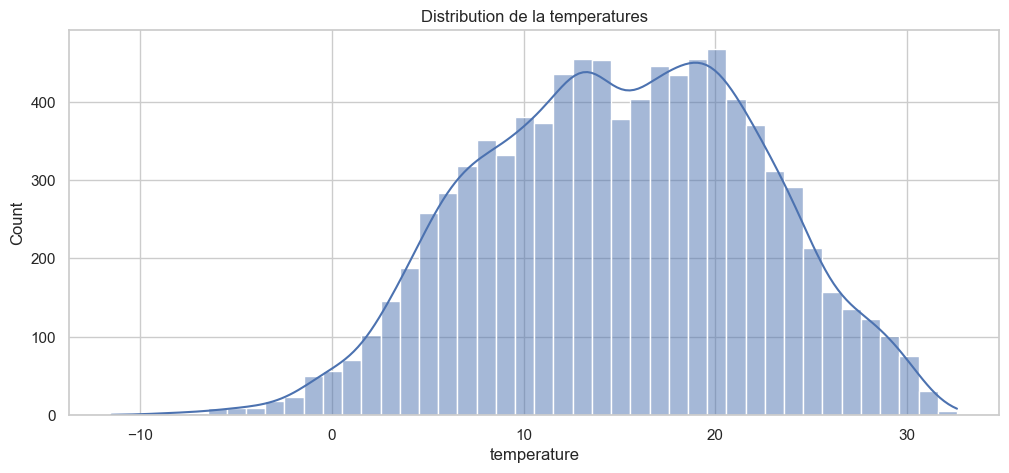

In [11]:
plt.figure(figsize=(12, 5))
sns.histplot(df['temperature'], kde=True)
plt.title("Distribution de la temperatures")
plt.show()

7. Evolution de la température moyenne dans le temps

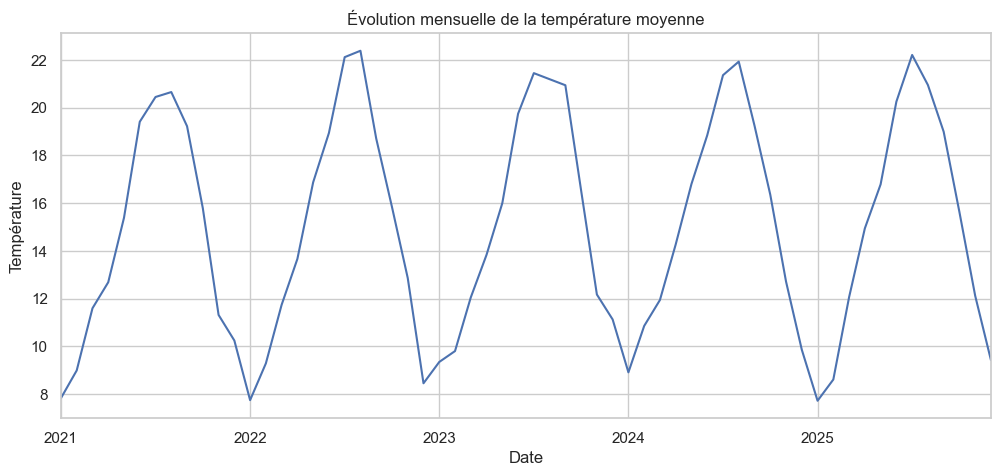

In [12]:
df["date_extraction"] = pd.to_datetime(df["date_extraction"])
df.set_index("date_extraction").resample("ME")["temperature"].mean().plot(figsize=(12, 5))
plt.title("Évolution mensuelle de la température moyenne")
plt.ylabel("Température")
plt.xlabel("Date")
plt.show()


8. Comparaison de la temperature par ville

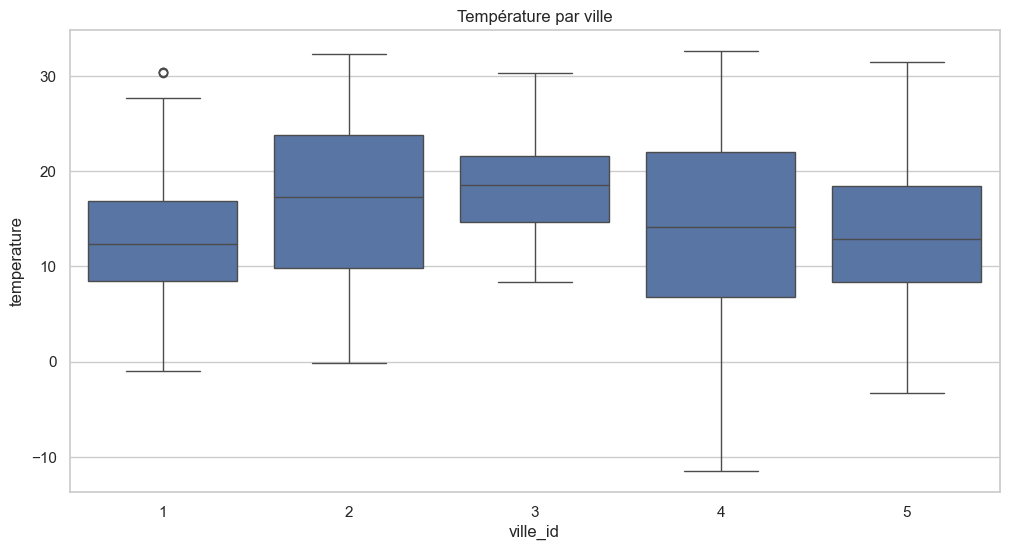

In [13]:
plt.figure(figsize=(12,6))
sns.boxplot(x="ville_id", y="temperature", data=df)
plt.title("Température par ville")
plt.show()


9. Analyse bivariée (corrélation)

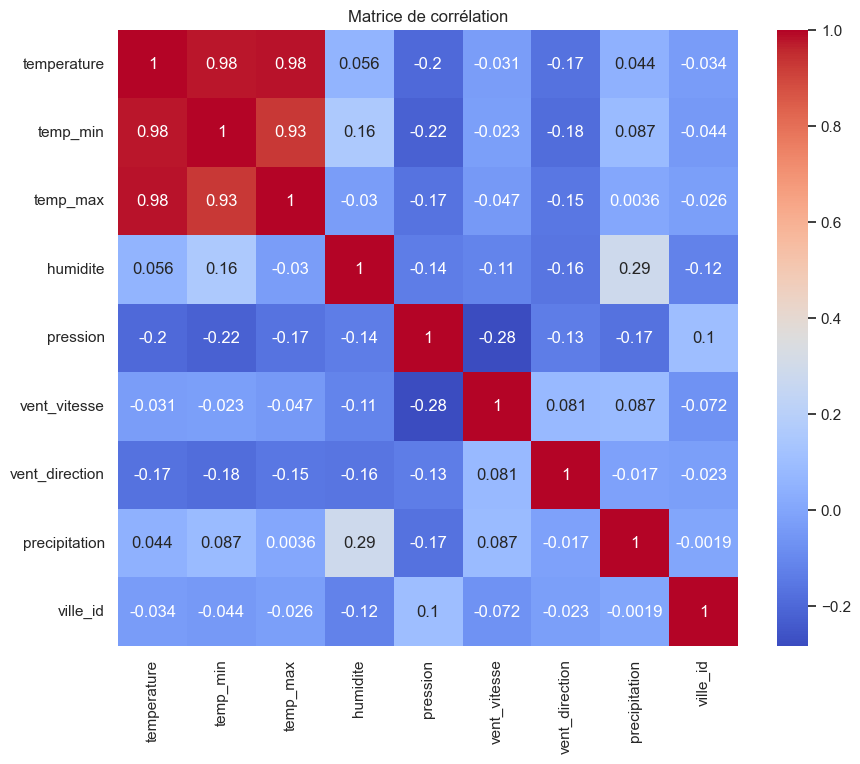

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Matrice de corrélation")
plt.show()


10. Conditions météo fréquentes

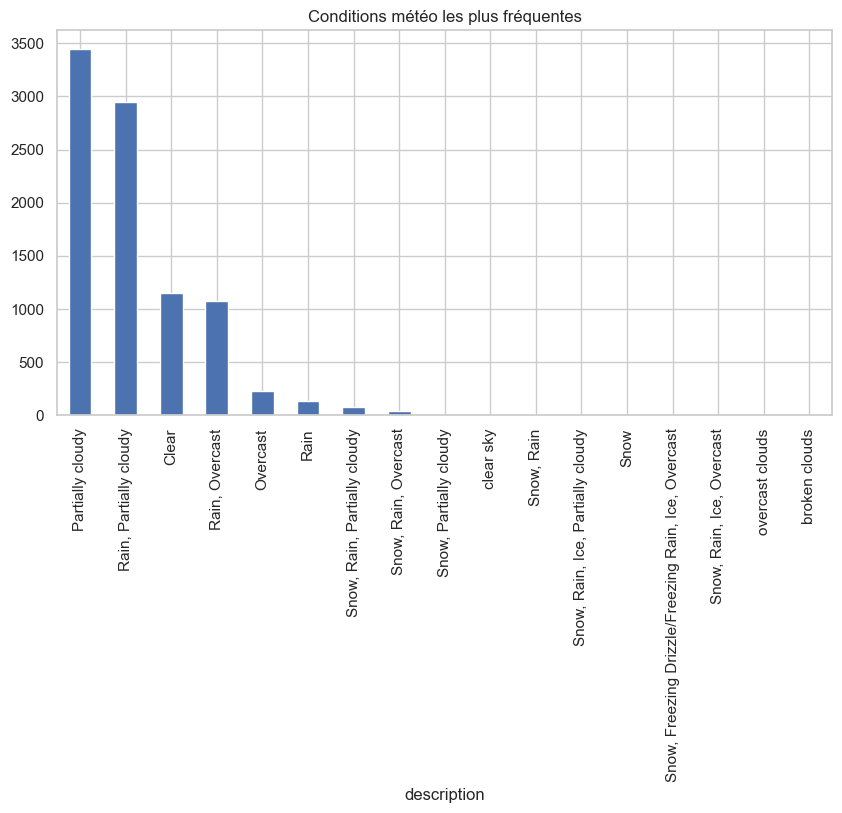

In [15]:
df["description"].value_counts().plot(kind='bar', figsize=(10,5))
plt.title("Conditions météo les plus fréquentes")
plt.show()


11. Histogramme des précipitations

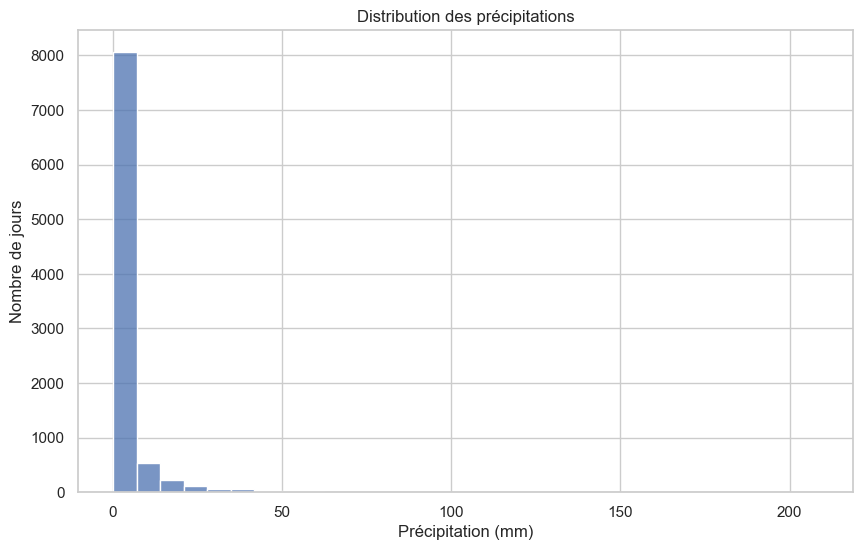

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(df['precipitation'], bins=30, kde=False)
plt.title("Distribution des précipitations")
plt.xlabel("Précipitation (mm)")
plt.ylabel("Nombre de jours")
plt.show()


12. Journées extrêmes

     a)  Les jours les plus chauds

In [17]:
jours_chauds = df.sort_values(by="temp_max", ascending=False).head(10)
print("🔴 10 jours les plus chauds :")
print(jours_chauds[["date_extraction", "temp_max", "ville_id"]])


🔴 10 jours les plus chauds :
     date_extraction  temp_max  ville_id
6039      2022-07-19      40.0         5
4214      2022-07-19      39.8         1
2897      2023-12-09      38.9         3
2902      2023-12-14      38.6         3
5305      2025-07-15      38.1         1
7117      2025-07-01      38.0         5
2945      2024-01-26      37.9         3
6038      2022-07-18      37.9         5
2619      2023-03-06      37.5         3
7130      2025-07-15      37.4         5


    b) Les jours les plus froids

In [18]:
jours_froids = df.sort_values(by="temp_min", ascending=True).head(10)
print("🔵 10 jours les plus froids :")
print(jours_froids[["date_extraction", "temp_min", "ville_id"]])

🔵 10 jours les plus froids :
     date_extraction  temp_min  ville_id
764       2023-02-04     -15.4         4
722       2022-12-24     -13.8         4
721       2022-12-23     -12.8         4
380       2022-01-16     -12.3         4
1481      2025-01-21     -11.5         4
1482      2025-01-22     -11.4         4
379       2022-01-15     -11.4         4
763       2023-02-03     -11.0         4
394       2022-01-30     -10.8         4
1452      2024-12-23     -10.8         4


    c) Les jours les plus humides

In [19]:
jours_humides = df.sort_values(by="humidite", ascending=False).head(10)
print("💧 10 jours les plus humides :")
print(jours_humides[["date_extraction", "humidite", "ville_id"]])


💧 10 jours les plus humides :
     date_extraction  humidite  ville_id
7482      2021-07-02      99.9         2
7526      2021-08-15      99.8         2
6905      2024-12-01      99.6         5
7797      2022-05-13      99.6         2
7489      2021-07-09      99.4         2
8114      2023-03-26      99.3         2
7525      2021-08-14      99.2         2
8922      2025-06-11      99.2         2
1906      2021-03-23      99.1         3
7861      2022-07-16      99.0         2


    d) Les jours les plus venteux

In [20]:
jours_venteux = df.sort_values(by="vent_vitesse", ascending=False).head(10)
print("💨 10 jours les plus venteux :")
print(jours_venteux[["date_extraction", "vent_vitesse", "ville_id"]])


💨 10 jours les plus venteux :
     date_extraction  vent_vitesse  ville_id
3468      2025-07-02          65.3         3
4063      2022-02-18          63.5         1
4746      2024-01-02          58.7         1
2279      2022-03-31          57.6         3
3303      2025-01-18          56.8         3
8155      2023-05-06          54.3         2
2907      2023-12-19          53.6         3
8182      2023-06-02          52.6         2
3121      2024-07-20          51.8         3
3302      2025-01-17          51.4         3
